## 한글폰트 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,219 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

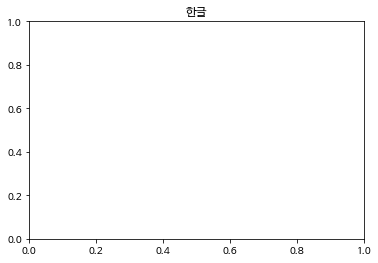

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
fig, ax = plt.subplots()
ax.set_title("한글")
plt.show()

## 구글 드라이브 연동

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# 경로추가
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/산대특/딥러닝 제출/catanddog'
train_dir = DATA_PATH + '/train/'
valid_dir = DATA_PATH + '/validation/'

## 주요 라이브러리 호출

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 이미지 시각화

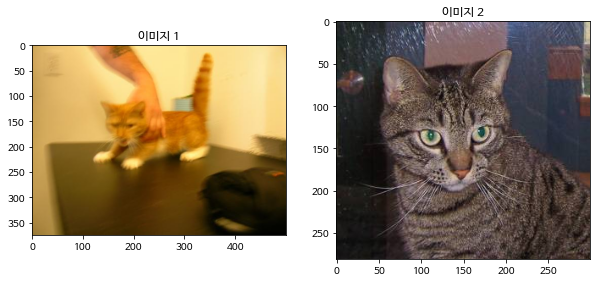

In [17]:
fig = plt.figure(figsize = (10,10))
img1 = cv2.imread(train_dir + 'Cat/0.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread(train_dir + 'Cat/1.jpg', cv2.IMREAD_COLOR)

plt.subplot(1,2,1)
plt.imshow(img1[:,:,::-1])
plt.title('이미지 1')

plt.subplot(1,2,2)
plt.imshow(img2[:,:,::-1])
plt.title('이미지 2')

plt.show()

## resnet50 모델 전이학습

In [18]:
model = ResNet50(include_top = True, # 기존 모델 사용
                 weights='imagenet', # imagenet 에 사용된 가중치를 이어받음
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)
model.summary()

102967424/102967424 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

### 밀집층 추가

In [19]:
model.trainable = False

model = Sequential([model, Dense(2, activation = 'sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


### 컴파일

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### ImageDataGenerator를 사용한 모델훈련

In [26]:
BATCH_SIZE = 32
image_height = 224
image_width = 224

train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(224,224), #colab에서 inputshape 오류 발생으로, tage_size shape 변경
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 77s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 77s/epoch - 6s/step
Epoch 2/10
13/13 - 6s - loss: 0.6931 - accuracy: 0.5403 - val_loss: 0.6931 - val_accuracy: 0.5204 - 6s/epoch - 475ms/step
Epoch 3/10
13/13 - 6s - loss: 0.6932 - accuracy: 0.4805 - val_loss: 0.6931 - val_accuracy: 0.5000 - 6s/epoch - 489ms/step
Epoch 4/10
13/13 - 6s - loss: 0.6932 - accuracy: 0.4727 - val_loss: 0.6931 - val_accuracy: 0.5714 - 6s/epoch - 467ms/step
Epoch 5/10
13/13 - 6s - loss: 0.6931 - accuracy: 0.5455 - val_loss: 0.6931 - val_accuracy: 0.5000 - 6s/epoch - 491ms/step
Epoch 6/10
13/13 - 7s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 7s/epoch - 554ms/step
Epoch 7/10
13/13 - 6s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 6s/epoch - 469ms/step
Epoch 8/10
13/13 - 6s - loss: 0.6926 - accuracy: 0.5273 - val_loss

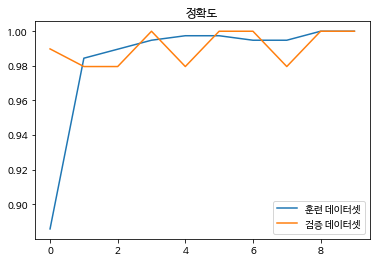

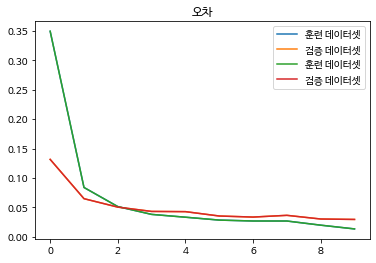

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')
plt.show()

1/1 [==============================] - 2s 2s/step


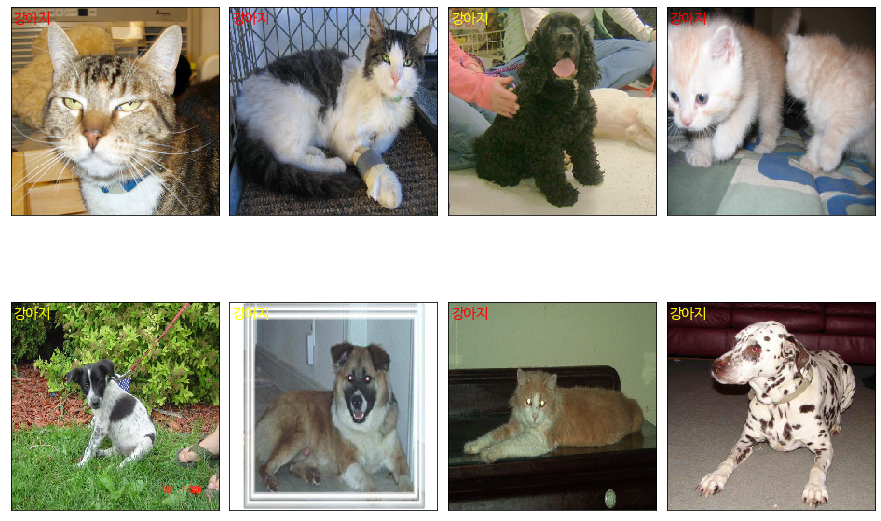

In [28]:
class_names = ['고양이', '강아지']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

### 텐서플로 허브

In [29]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False),  
    tf.keras.layers.Dense(2, activation='softmax')
])

In [30]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [32]:
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/10
13/13 - 20s - loss: 0.3494 - accuracy: 0.8857 - val_loss: 0.1316 - val_accuracy: 0.9898 - 20s/epoch - 2s/step
Epoch 2/10
13/13 - 8s - loss: 0.0839 - accuracy: 0.9844 - val_loss: 0.0648 - val_accuracy: 0.9796 - 8s/epoch - 587ms/step
Epoch 3/10
13/13 - 7s - loss: 0.0514 - accuracy: 0.9896 - val_loss: 0.0505 - val_accuracy: 0.9796 - 7s/epoch - 515ms/step
Epoch 4/10
13/13 - 7s - loss: 0.0381 - accuracy: 0.9948 - val_loss: 0.0432 - val_accuracy: 1.0000 - 7s/epoch - 530ms/step
Epoch 5/10
13/13 - 8s - loss: 0.0333 - accuracy: 0.9974 - val_loss: 0.0428 - val_accuracy: 0.9796 - 8s/epoch - 598ms/step
Epoch 6/10
13/13 - 7s - loss: 0.0284 - accuracy: 0.9974 - val_loss: 0.0354 - val_accuracy: 1.0000 - 7s/epoch - 523ms/step
Epoch 7/10
13/13 - 8s - loss: 0.0269 - accuracy: 0.9948 - val_loss: 0.0336 - val_accuracy: 1.0000 - 8s/epoch - 589ms/step
Epoch 8/10
13/13 - 7s - loss: 0.0269 - accuracy: 0.9948 - val_loss: 0.0365 - val_accuracy: 0.9796 - 7s/epoch - 524ms/step
Epoch 9/10
13/13 - 7s - l

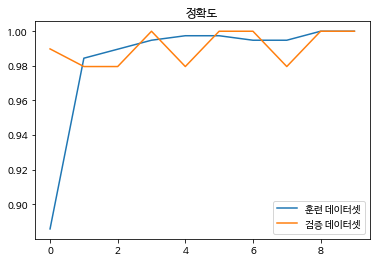

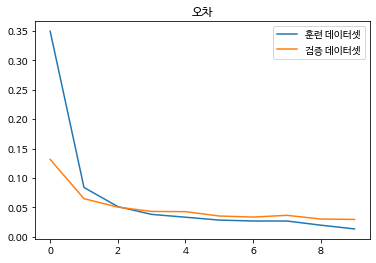

In [36]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

plt.show()

1/1 [==============================] - 1s 1s/step


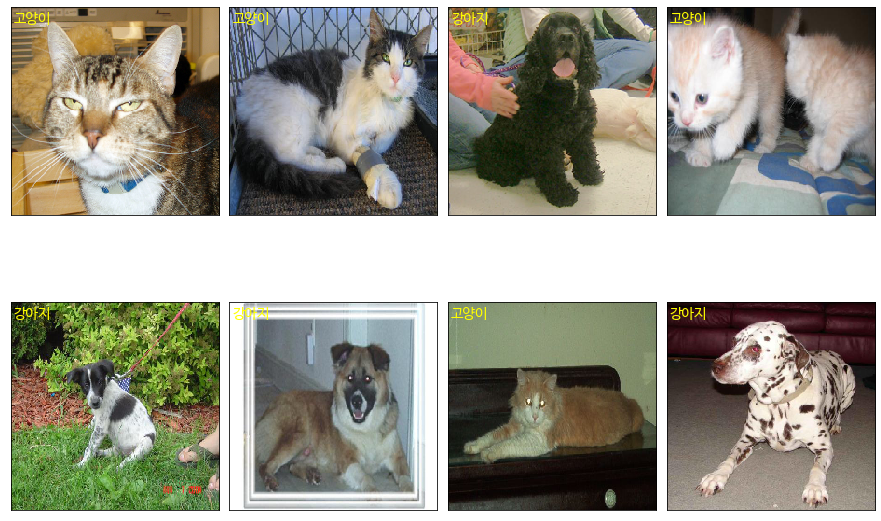

In [37]:
class_names = ['고양이', '강아지']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)